# Importing the Dependinces

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

# Data collection

In [4]:
#loading the data set in pandas dataframe
data=pd.read_csv('/content/Bostan.csv')

In [5]:
#read csv file in pandas dataframe
pd.read_csv?

In [6]:
#printing the dataset
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
#printing the first 5 rows of the dataset
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
#printing the last 5 rows of the dataset
data.tail()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [9]:
#cheack the shape of the data shape
data.shape

(506, 15)

In [10]:
#checking the statistical measures of the dataset
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Understanding the correlation between variable features in dataset

1.Possitive correlation

2.Negative correlation

In [11]:
correlation=data.corr()

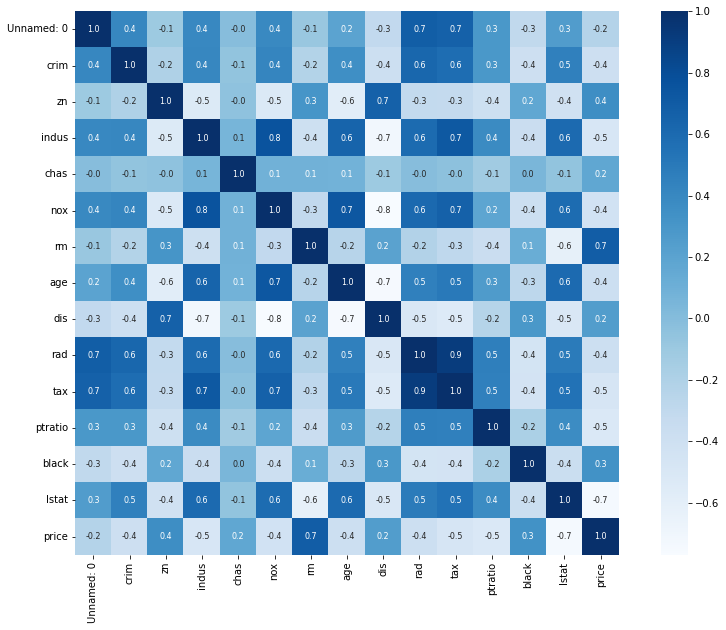

In [15]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(15,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
#splitting the data and target
X=data.drop(['price'], axis=1)
Y=data['price']

In [18]:
#printing X and Y
print(X)
print(Y)

     Unnamed: 0     crim    zn  indus  chas  ...  rad  tax  ptratio   black  lstat
0             1  0.00632  18.0   2.31     0  ...    1  296     15.3  396.90   4.98
1             2  0.02731   0.0   7.07     0  ...    2  242     17.8  396.90   9.14
2             3  0.02729   0.0   7.07     0  ...    2  242     17.8  392.83   4.03
3             4  0.03237   0.0   2.18     0  ...    3  222     18.7  394.63   2.94
4             5  0.06905   0.0   2.18     0  ...    3  222     18.7  396.90   5.33
..          ...      ...   ...    ...   ...  ...  ...  ...      ...     ...    ...
501         502  0.06263   0.0  11.93     0  ...    1  273     21.0  391.99   9.67
502         503  0.04527   0.0  11.93     0  ...    1  273     21.0  396.90   9.08
503         504  0.06076   0.0  11.93     0  ...    1  273     21.0  396.90   5.64
504         505  0.10959   0.0  11.93     0  ...    1  273     21.0  393.45   6.48
505         506  0.04741   0.0  11.93     0  ...    1  273     21.0  396.90   7.88

[50

In [19]:
#spliting the data into training data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=2, test_size=0.2)

In [20]:
#print x train and test data shape
print(X.shape, X_train.shape, X_test.shape)

(506, 14) (404, 14) (102, 14)


# model training : with xgboost

In [21]:
#loading the model
model = XGBRegressor()

In [22]:
#fitting the model in train dataset
model.fit(X_train,Y_train)

[14:57:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

# Model Eveualtion 

training data accuracy score 

In [23]:
training_data_prediction=model.predict(X_train)

In [26]:
#R squared error 
score_1=metrics.r2_score(Y_train,training_data_prediction)

In [27]:
#print the r squared error
print('training dataset Accuracy score: ',score_1)

training dataset Accuracy score:  0.9750399800326867


In [34]:
#mean absolute error training data
score_1=metrics.mean_absolute_error(Y_train,training_data_prediction)

In [35]:
#mean absolute erroe
print('mean absolute erroe',score_1)

mean absolute erroe 1.1070603292767363


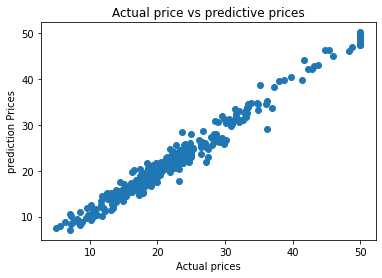

In [36]:
#visualizing the actual prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("prediction Prices")
plt.title("Actual price vs predictive prices")
plt.show()

test data accuracy score

In [28]:
test_data_prediction=model.predict(X_test)

In [30]:
#R squared error 
score_2=metrics.r2_score(Y_test,test_data_prediction)

In [31]:
#print the r squared error
print('training dataset Accuracy score: ',score_2)

training dataset Accuracy score:  0.9126099646669855


In [37]:
#mean absolute error test data
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [39]:
#mean absolute error test data
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [40]:
#mean absolute erroe
print('mean absolute erroe',score_2)

mean absolute erroe 2.0023161317787914


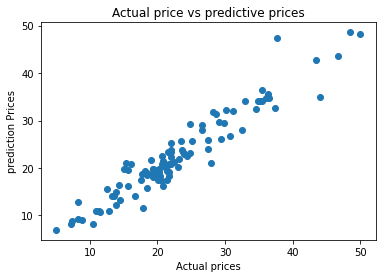

In [41]:
#visualizing the actual prices and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("prediction Prices")
plt.title("Actual price vs predictive prices")
plt.show()

# Bulleding the model

In [1]:
input_data=(0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90)

In [ ]:
#changing the input data in numpy array
#input_data_as_numpy_array=np.asarray(input_data)

In [ ]:
#reshaped the input_data_as_numpy_array
#input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [ ]:
#model predictive 
#prediction=model.predict(input_data_reshaped)

#print("The price of the houes is: ",prediction[0])